In [22]:
import warnings
warnings.simplefilter("ignore", FutureWarning)

In [23]:
import matplotlib.pyplot as plt
import os, sys
import numpy as np
from PIL import Image
import cv2

import pandas as pd
import seaborn as sns
from scipy import stats

import json
import ujson
from datetime import datetime, timedelta
from scipy.stats import entropy
import matplotlib.dates as mdates
import kneed
from kneed import DataGenerator, KneeLocator
DEBUG = False

import os
import glob

In [1]:
def entropy_full_sup(color,min_color, max_color, i):
    color= pd.Series(color)
    s = color.value_counts(bins = np.linspace(min_color,max_color,i))
    return entropy(s, base=2)

In [25]:
def entropy_curve(color):
    x = [5,10,20,30,50,75,100,200,300,400,500,1000,1500,2000,2500,5000,10000]
    sns.histplot(color)
    plt.show()
    plt.close()
    Entropy_val =[]
    
    for i in x:
        val = entropy_full_sup(color,color.min(),color.max(), i)
        print(val)
    
        Entropy_val.append(val)
    y = Entropy_val
    kneedle = kneed.KneeLocator(x,y , S=1, curve="concave", direction="increasing")
    knee_point = kneedle.knee #elbow_point = kneedle.elbow
    print('Knee: ', knee_point) #print('Elbow: ', elbow_point)

    # Plot the data and the knee
    plt.plot(x, y, '-o')
    plt.axvline(knee_point, color='red', linestyle='--')
    plt.show()
    values_Entorpy = [color.min(),color.max(),knee_point]
    print(values_Entorpy)
    return values_Entorpy


In [5]:
import glob
import pandas as pd


path = r'H:\\230124\\'

# Get a list of all the CSV files in the directory
csv_files = glob.glob(path + '**/Time_points_dfs_*.csv', recursive=True)

# Create an empty dictionary to store the DataFrames
dfs = {}

# Loop through each CSV file
for file in csv_files:
    # Split the file name to get the number
    number = file.split('_')[-1].split('.')[0]
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    # If the number is not already in the dictionary, add it
    if number not in dfs:
        dfs[number] = df
    # If the number is already in the dictionary, concatenate the DataFrames
    else:
        dfs[number] = pd.concat([dfs[number], df], axis=0, ignore_index=True)

KeyboardInterrupt: 

In [26]:
# create a list to store the JSON files
json_files = []

pathes = [r'E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\']

for p in pathes:
    # set the path for the folder that contains the JSON files
    path = p

    # loop through the folder and add every 60th JSON file to the list
    for i, filename in enumerate(os.listdir(path)):
        if filename.endswith('.json') and (i+1) % 600 == 0:
            json_files.append(os.path.join(path, filename))

    # loop through the list and load each
    
data = pd.DataFrame()


for f_name in json_files:
    num = f_name.split('-')
    print(f_name)
    df = pd.read_json(f_name, lines=True)
    data = data.append(df)

# data = data.drop('Date',axis=1)
data = data.reset_index(drop=True)
# data = data.astype(float)

E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-182430.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-183433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-184433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-185433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-190433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-191433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-192433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-193433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-194433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-195433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-200433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230404-201433.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\202304

E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-115914.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-120914.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-121916.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-122916.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-123916.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-124916.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-125916.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-130916.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-131916.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-132916.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-133916.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230405-134916.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\202304

E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-053932.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-054934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-055934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-060934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-061934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-062934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-063934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-064934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-065934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-070934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-071934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230406-072934.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\202304

E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-014955.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-015955.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-020955.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-021955.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-022955.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-023955.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-024955.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-025955.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-030956.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-031956.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-032956.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-033956.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\202304

E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-201023.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-202023.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-203024.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-204024.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-205024.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-210024.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-211024.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-212024.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-213024.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-214024.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-215024.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230407-220024.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\202304

E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-150047.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-151049.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-152049.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-153049.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-154049.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-155049.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-160049.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-161049.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-162050.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-163050.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-164050.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\2023040412\\20230408-165050.json
E:\\Dropbox (Weizmann Institute)\\Time lapse\\202304

In [27]:
CSV_path =r'E:\\Dropbox (Weizmann Institute)\Time lapse\\CSV_FB_20230404\\'

# Create an empty dictionary to store the DataFrames
dfs = {}

extension = 'csv'
os.chdir(CSV_path)
result = glob.glob('*.{}'.format(extension))
    
for i in range(1,16):
    well = str(i).zfill(2)

    df = pd.read_csv('Time_points_dfs_'+well+'.csv')
    dfs[i] = df


In [28]:
# get Full support measuerments for GFP and RFP
for_entropy = pd.DataFrame(columns = ['Mean_GFP','Mean_RFP'])
for i in dfs:
    df = dfs[i]
    df_Short = pd.DataFrame()
    df_Short[['Mean_GFP','Mean_RFP']] = df[['mean_F_C2','mean_F_C3']]
    for_entropy = for_entropy.append(df_Short)

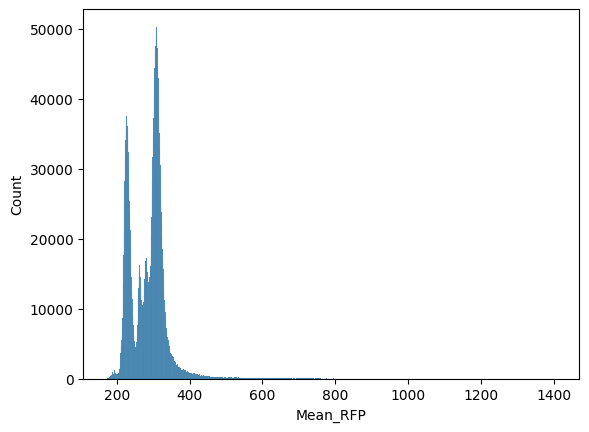

0.08299386631668774
1.0418888459998819
1.7800407565279095
2.002266189123323
2.6622360641807905
3.224058870209196
3.6106948415474003
4.588829737080592
5.168354644593609
5.581633200653692
5.902883570175041
6.902059521340634
7.486777727118596
7.901489970056773
8.223249671750118
9.221636570128048
10.218528130881486
Knee:  1500


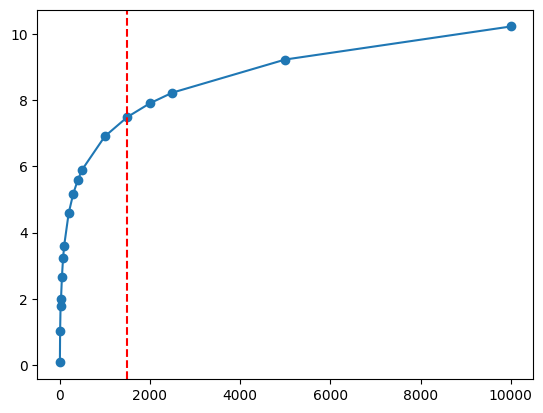

[169.5940170940171, 1408.4260504201682, 1500]


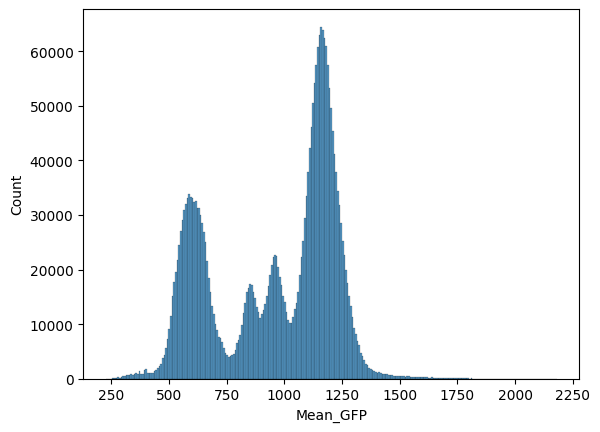

1.4147373296585808
2.0146542085637344
3.010993731050148
3.5630261705702413
4.2874613876445204
4.873923738828976
5.290614595437959
6.294390542643448
6.88091506227465
7.2968399628630305
7.619253339553744
8.620146676162028
9.20508867742908
9.619960910935452
9.941558141524299
10.93992951368596
11.936333489383678
Knee:  1500


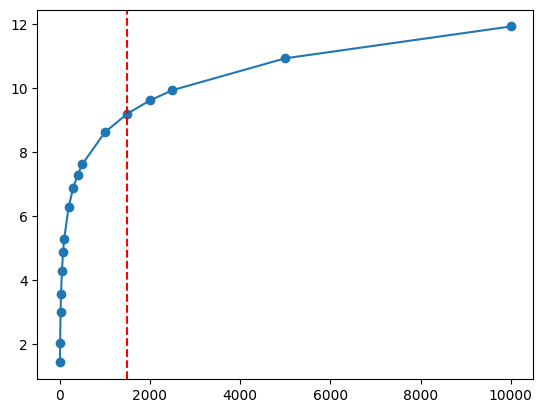

[226.7664835164835, 2179.6913580246915, 1500]


In [29]:
RFP_entropy_vals = entropy_curve(for_entropy['Mean_RFP'])
GFP_entropy_vals = entropy_curve(for_entropy['Mean_GFP'])

In [19]:
# calculate entropy levels base on full support

for i in dfs:
    df = dfs[i]
    time = df['Time_Stamp'].unique()
    for t in time:
        rel_df = df[df['Time_Stamp']==t]
        entropy_val_GFP =  entropy_full_sup(rel_df['mean_F_C2'],GFP_entropy_vals[0],GFP_entropy_vals[1],GFP_entropy_vals[2])
        dfs[i].loc[dfs[i]['Time_Stamp']==t, 'GFP_entropy']=entropy_val_GFP
        entropy_val_RFP =  entropy_full_sup(rel_df['mean_F_C3'],RFP_entropy_vals[0],RFP_entropy_vals[1],RFP_entropy_vals[2])
        dfs[i].loc[dfs[i]['Time_Stamp']==t, 'RFP_entropy']=entropy_val_RFP

KeyboardInterrupt: 

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

def entropy_full_sup(color, min_color, max_color, i):
    color = pd.Series(color)
    s = color.value_counts(bins=np.linspace(min_color, max_color, i))
    return entropy(s, base=2)

def calculate_entropies(group, min_max_vals):
    group['GFP_entropy'] = entropy_full_sup(group['mean_F_C2'], *min_max_vals['GFP'])
    group['RFP_entropy'] = entropy_full_sup(group['mean_F_C3'], *min_max_vals['RFP'])
    return group

min_max_vals = {
    'GFP': GFP_entropy_vals,
    'RFP': RFP_entropy_vals
}

for i in dfs:
    df = dfs[i]
    dfs[i] = df.groupby('Time_Stamp').apply(lambda group: calculate_entropies(group, min_max_vals))


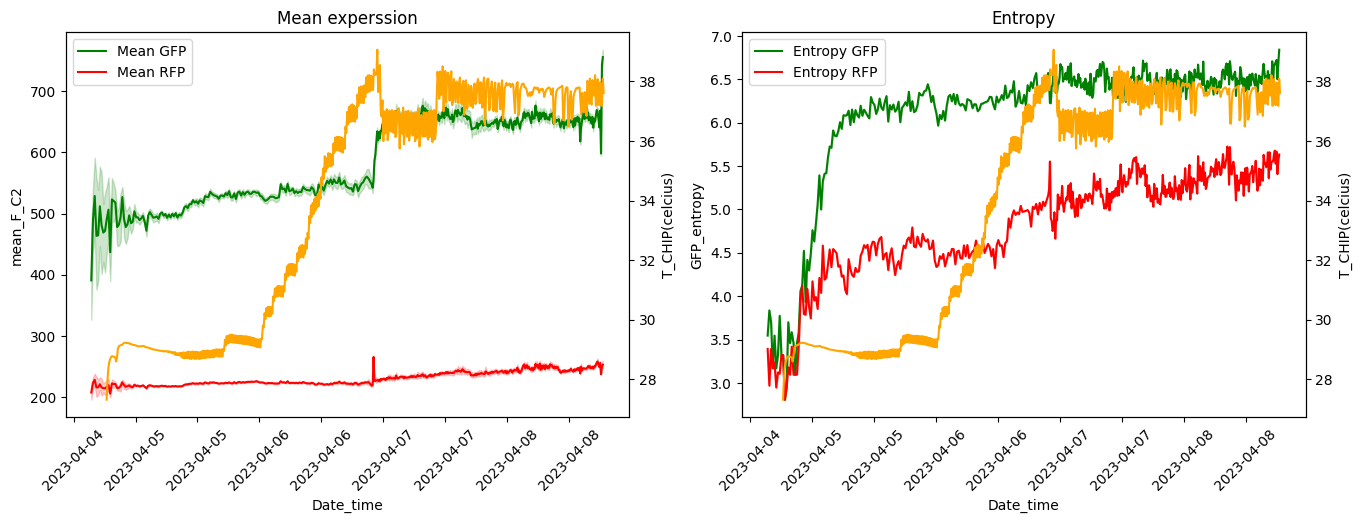

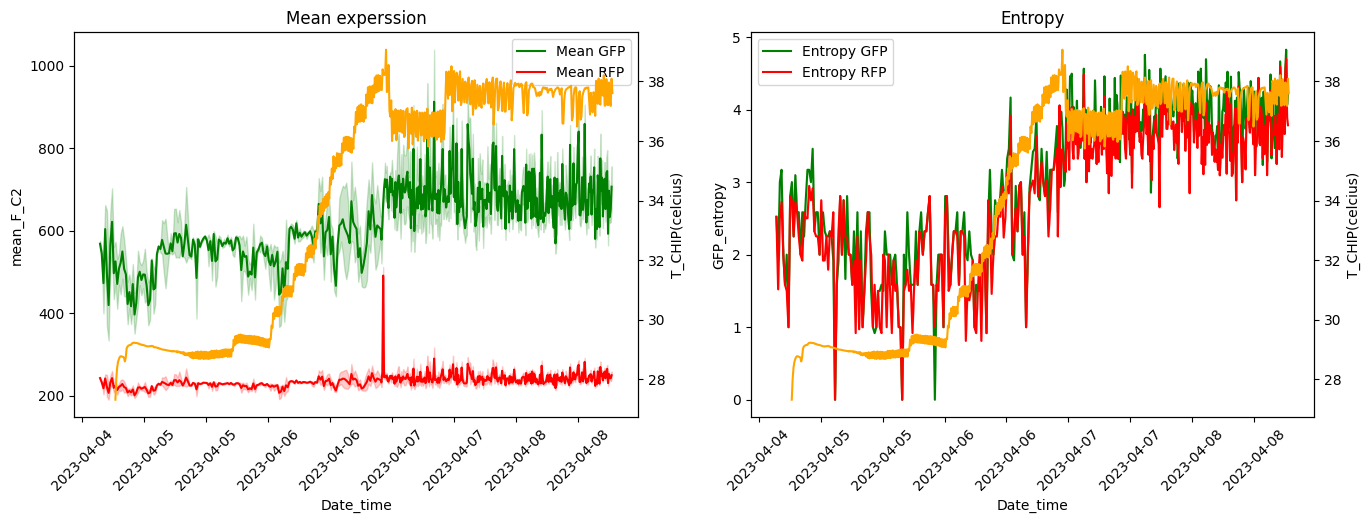

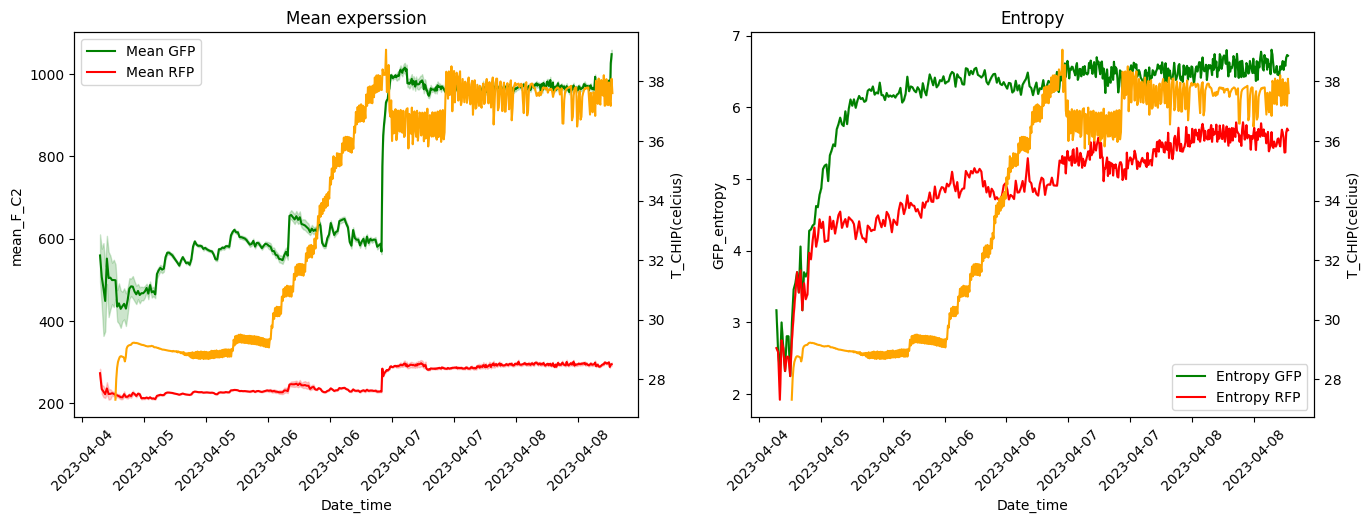

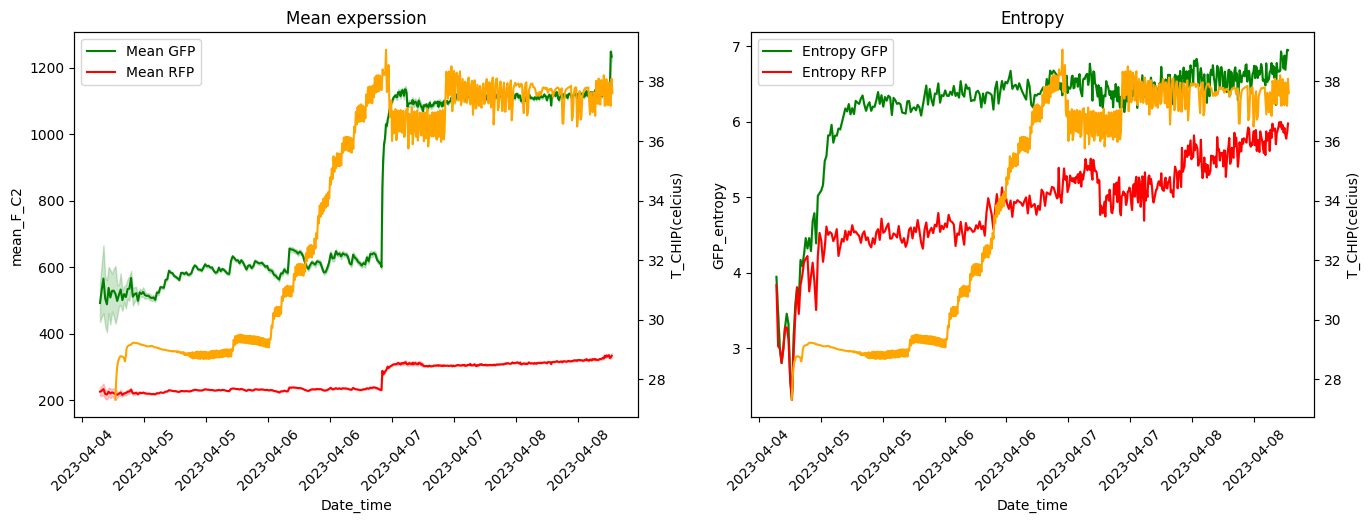

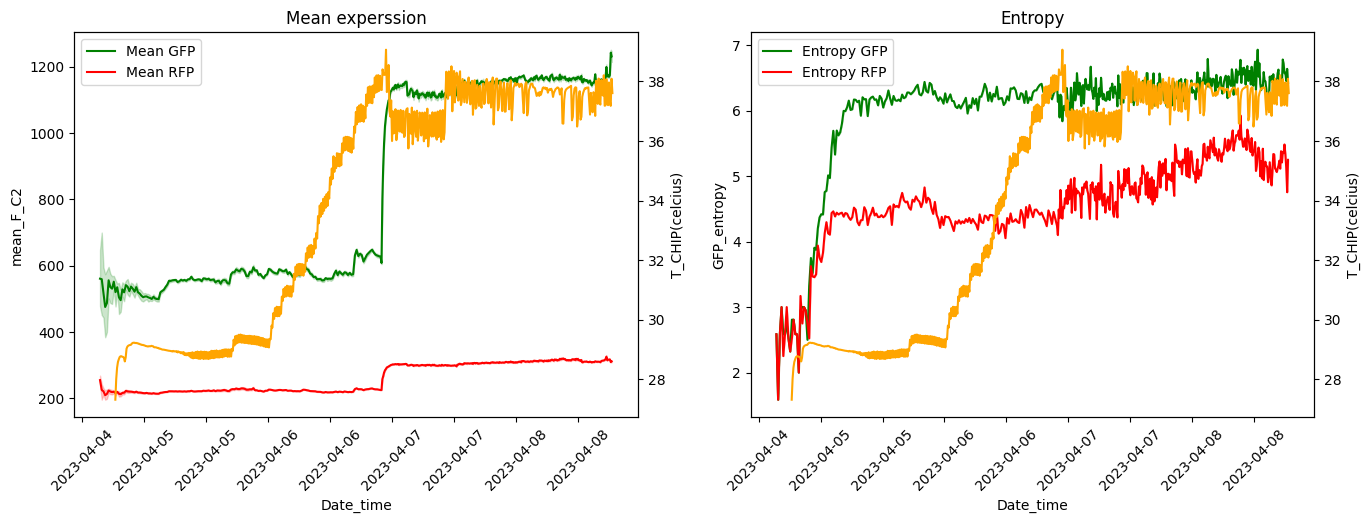

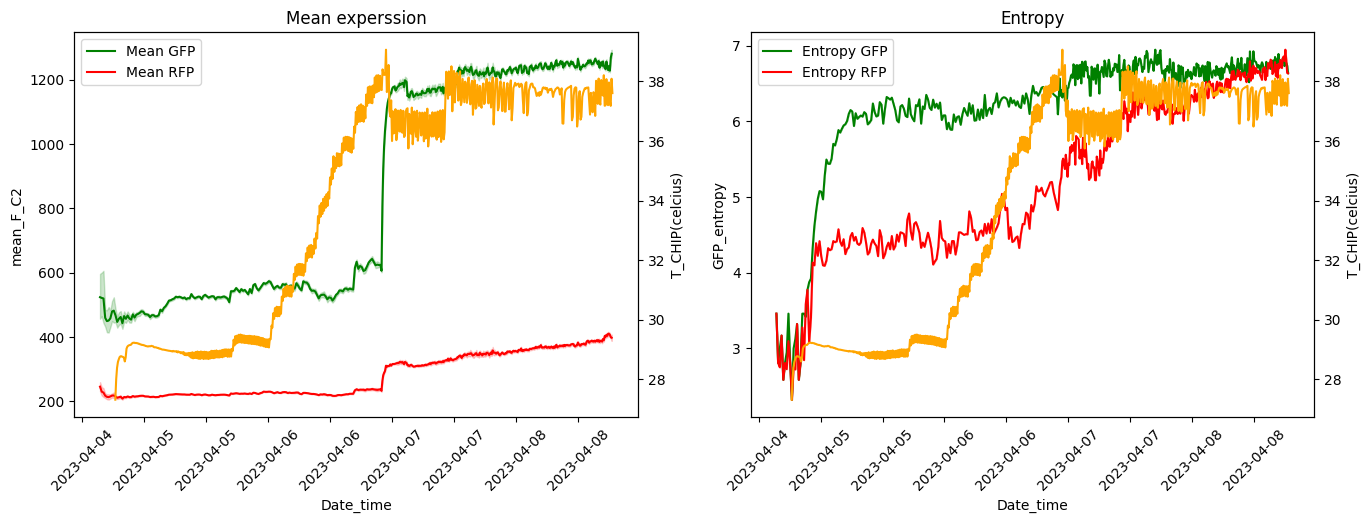

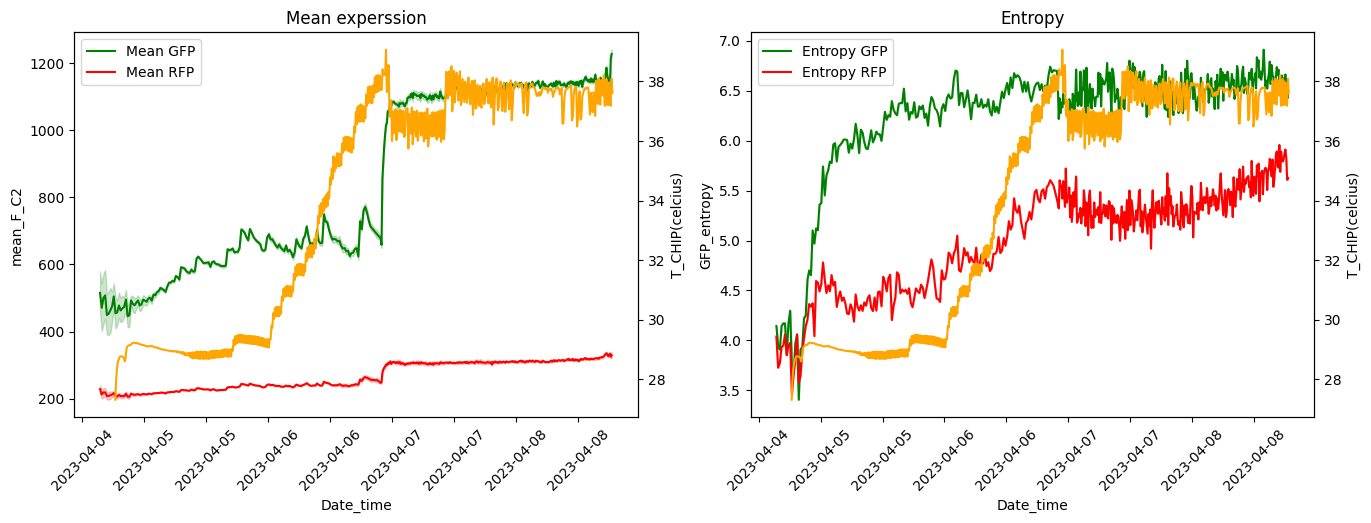

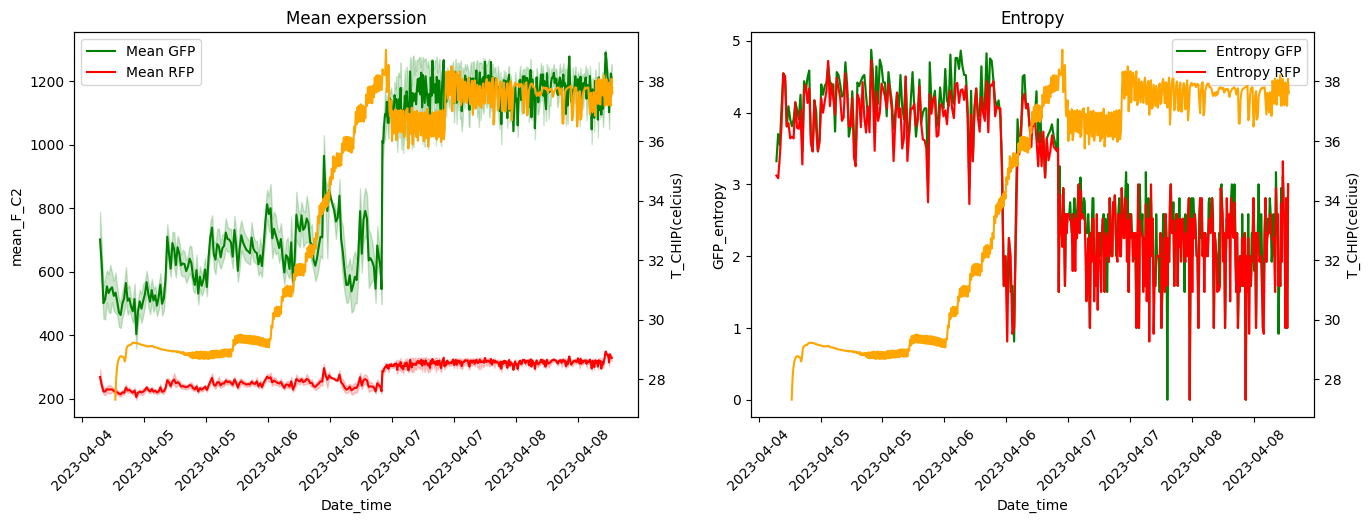

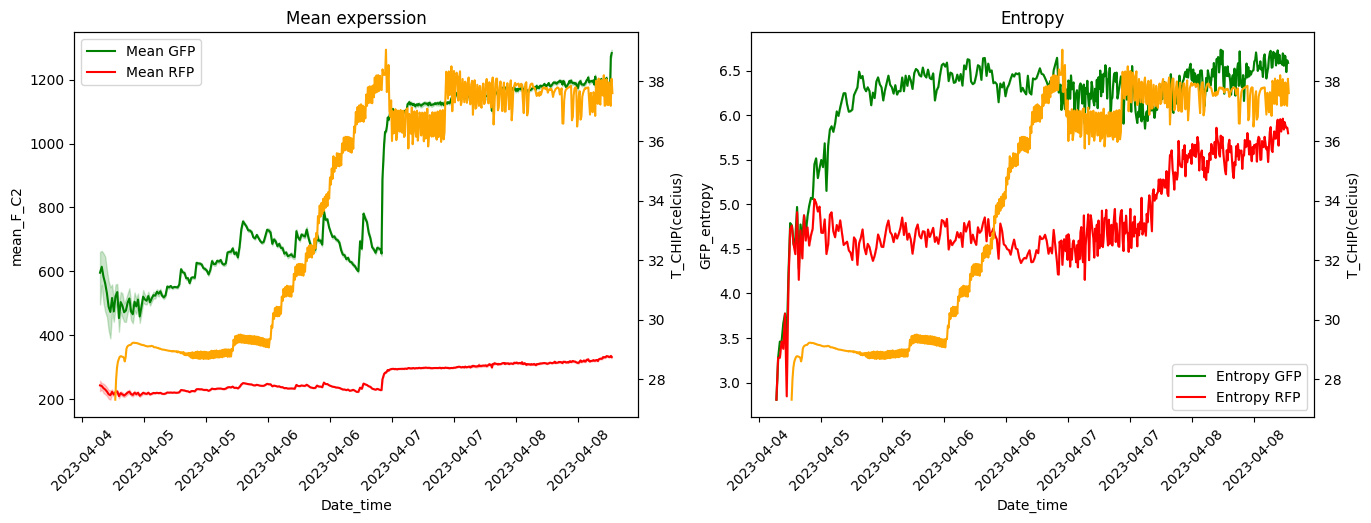

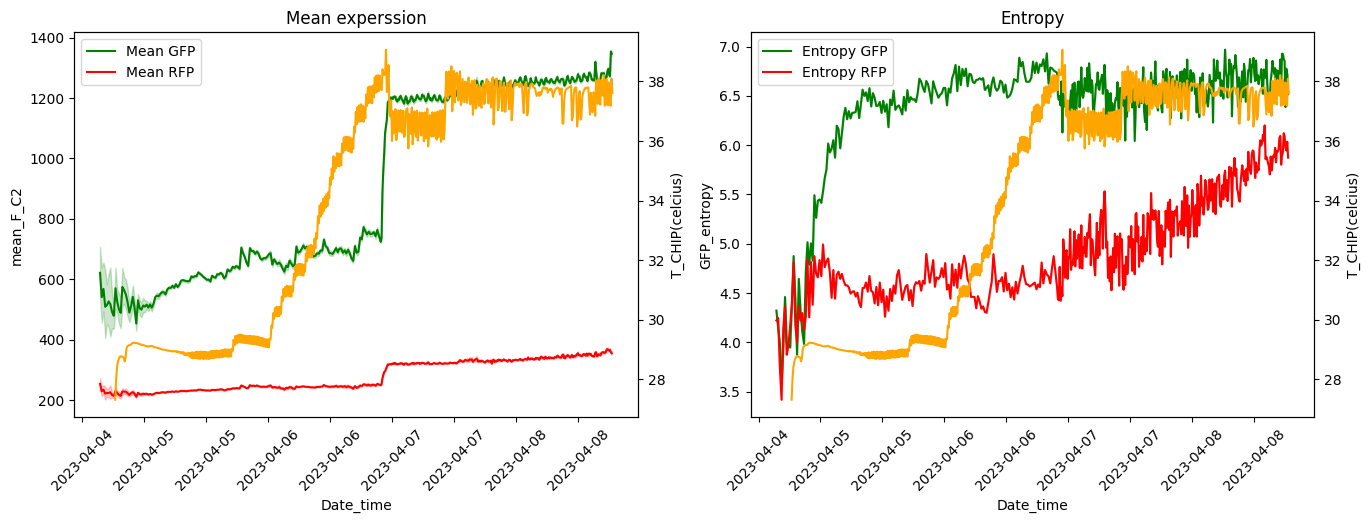

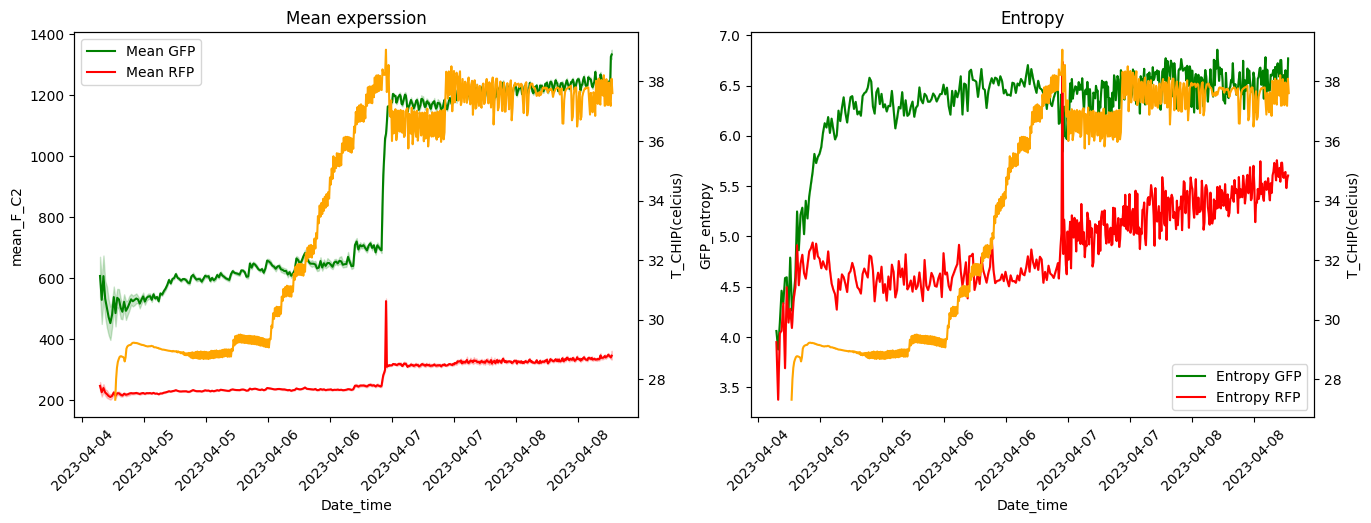

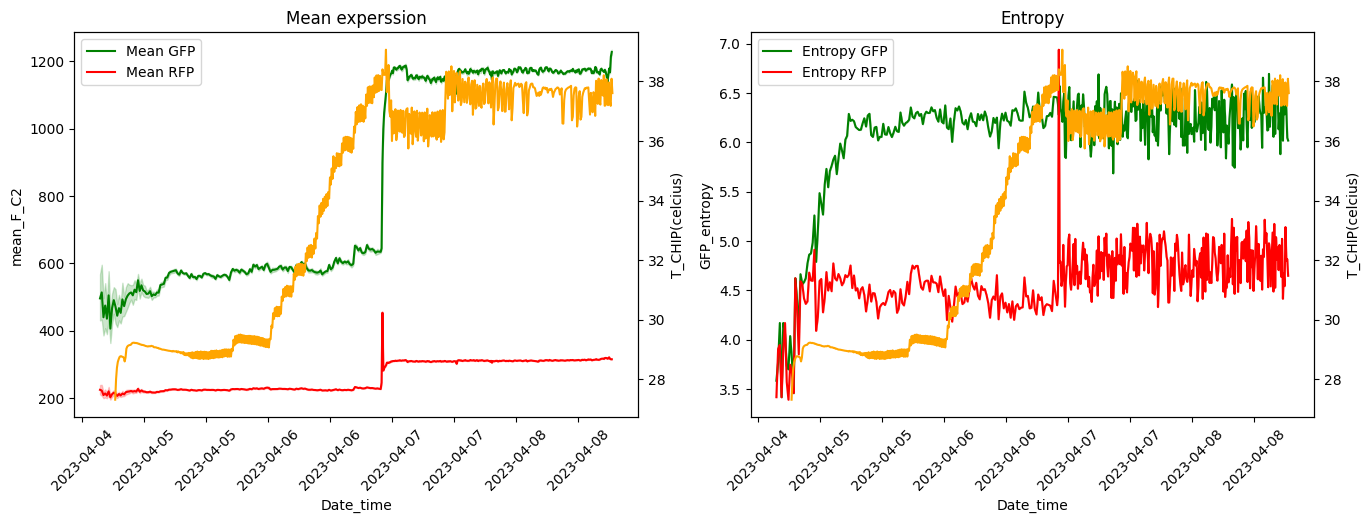

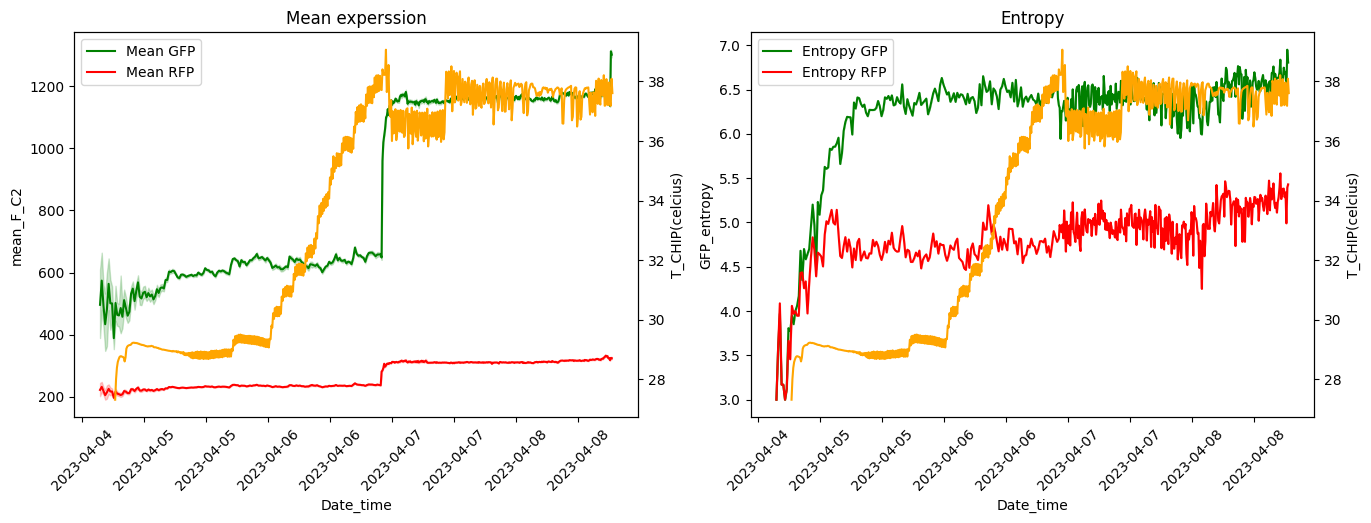

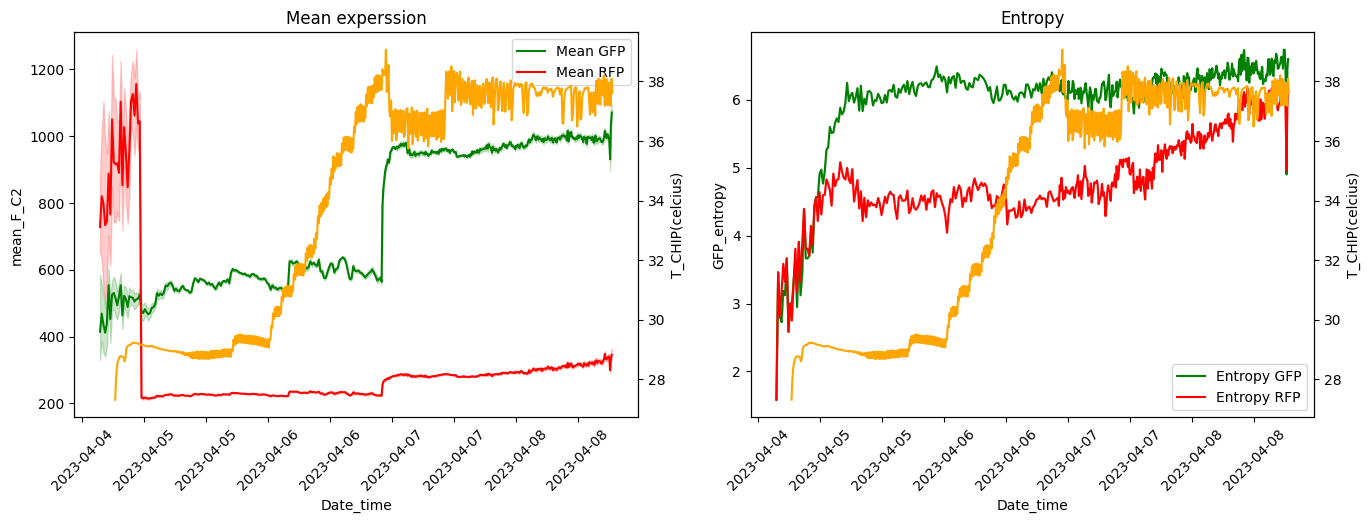

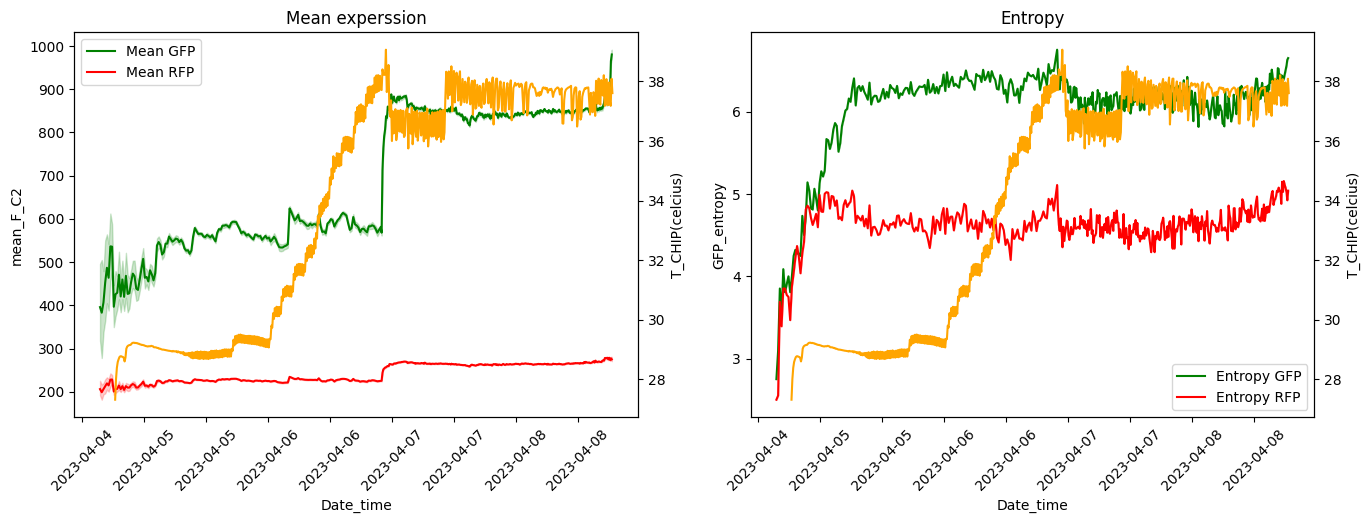

In [31]:
# Plot a specific well
for i in range(1,16):
    Plot_well = dfs[i]
    Plot_well['Date_time'] = pd.to_datetime(Plot_well["Time_Stamp"], format='%Y%m%d-%H%M%S')

    import matplotlib.dates as mdates
    # Initialize figure and subplots
    fig, (axi, axii) = plt.subplots(1, 2, figsize=(16,5))


    # ax = sns.lineplot(x = 'Date_time', y = 'GFP_entropy', data = Plot_well, label = 'GFP_entropy', color = 'green')
    # ax = sns.lineplot(x = 'Date_time', y = 'RFP_entropy', data = Plot_well, label = 'RFP_entropy', color = 'red')
    axi = sns.lineplot(x = 'Date_time', y = 'mean_F_C2', data = Plot_well, label = 'Mean GFP', color = 'green',ax = axi )
    axi = sns.lineplot(x = 'Date_time', y = 'mean_F_C3', data = Plot_well, label = 'Mean RFP', color = 'red',ax = axi )

    # ax = sns.lineplot(x = 'Date_time', y = 'area', data = try_df)

    # Add the secondary y-axis on the right
    ax2 = axi.twinx()

    # Plot `data['T_CHIP(celcius)']` against the secondary y-axis
    sns.lineplot(x = data['Date'], y = data['T_CHIP(celcius)'], ax = ax2, color = 'orange', label = 'Temp in C',legend=False)


    axi.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    xticks = axi.get_xticklabels()
    plt.setp(xticks, rotation=45)

    axi.set_title("Mean experssion")
    # ax = sns.lineplot(x = 'Date_time', y = 'GFP_entropy', data = Plot_well, label = 'GFP_entropy', color = 'green')
    # ax = sns.lineplot(x = 'Date_time', y = 'RFP_entropy', data = Plot_well, label = 'RFP_entropy', color = 'red')
    axii = sns.lineplot(x = 'Date_time', y = 'GFP_entropy', data = Plot_well, label = 'Entropy GFP', color = 'green',ax = axii )
    axii = sns.lineplot(x = 'Date_time', y = 'RFP_entropy', data = Plot_well, label = 'Entropy RFP', color = 'red',ax = axii )

    # ax = sns.lineplot(x = 'Date_time', y = 'area', data = try_df)

    # Add the secondary y-axis on the right
    ax2i = axii.twinx()

    # Plot `data['T_CHIP(celcius)']` against the secondary y-axis
    sns.lineplot(x = data['Date'], y = data['T_CHIP(celcius)'], ax = ax2i, color = 'orange', label = 'Temp in C',legend=False)


    axii.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    xticks = axii.get_xticklabels()
    plt.setp(xticks, rotation=45)
    axii.set_title("Entropy")

    # # Format the x-axis as dates
    # lines1, labels1 = ax.get_legend_handles_labels()
    # lines2, labels2 = ax2.get_legend_handles_labels()
    # ax.legend(lines1 + lines2, labels1 + labels2, loc = 'upper left')

    plt.show()


In [76]:
convert -delay 20 -loop 0 image1.gif image2.mp4 output.gif


ERROR: Could not find a version that satisfies the requirement FFMpegWriter (from versions: none)
ERROR: No matching distribution found for FFMpegWriter


<IPython.core.display.Javascript object>


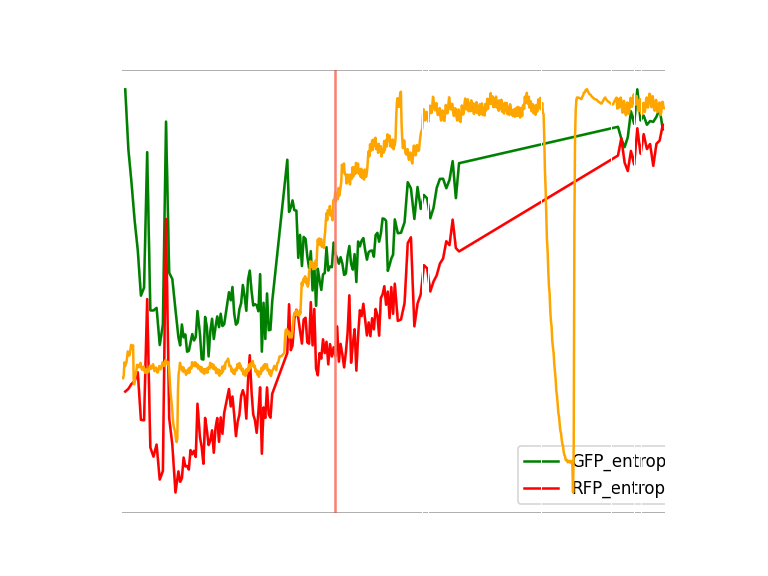

In [82]:
import matplotlib as mpl 
mpl.rcParams['animation.ffmpeg_path'] = r'C:\\Users\\Maor\\anaconda3\\Lib\\site-packages\\imageio_ffmpeg\\binaries\\ffmpeg-win64-v4.2.2.exe'
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation


Plot_well = dfs['023']
Plot_well['Date_time'] = pd.to_datetime(Plot_well["Time_Stamp"], format='%Y%m%d-%H%M%S')

import matplotlib.dates as mdates

ax = sns.lineplot(x = 'Date_time', y = 'GFP_entropy', data = Plot_well, label = 'GFP_entropy', color = 'green')
ax = sns.lineplot(x = 'Date_time', y = 'RFP_entropy', data = Plot_well, label = 'RFP_entropy', color = 'red')
# ax = sns.lineplot(x = 'Date_time', y = 'Number_cells', data = Plot_well, label = 'Cell count', color = 'blue')
# ax = sns.lineplot(x = 'Date_time', y = 'area', data = try_df)

# Add the secondary y-axis on the right
ax2 = ax.twinx()

# Plot `data['T_CHIP(celcius)']` against the secondary y-axis
sns.lineplot(x = data['Date'], y = data['T_CHIP(celcius)'], ax = ax2, color = 'orange', label = 'Temp in C',legend=False)


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

line = plt.axvline(x=data['Date'].iloc[0], color='salmon')
x_timestamps = [mdates.date2num(d) for d in data['Date'].values]


def update(frame):
    line.set_xdata([frame, frame])

ani = animation.FuncAnimation(plt.gcf(), update, frames = x_timestamps, interval=0.01)

plt.show()

f = r"H://animation.gif" 
writergif = animation.PillowWriter(fps=30) 
ani.save(f, writer=writergif)

# f = r"H://animation.mp4"
# writervideo = animation.FFMpegWriter(fps=60)
# ani.save(f, writer=writervideo)


In [79]:
!pip install ffmpeg-python

  Using cached ffmpeg_python-0.2.0-py3-none-any.whl (25 kB)
     -------------------------------------- 840.9/840.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492055 sha256=5a0a413d7e0a38413c5a8290ce4ba741f50ff5b91efe721b995c4fb0000b2f31
  Stored in directory: c:\users\maor\appdata\local\pip\cache\wheels\0c\ff\54\efb16da5b1058114a457b3c7167904915d2e5764b637ae8d3d
Successfully built future


In [ ]:
import os
import pandas as pd

root_dir = r'H:\\230124\\'
csv_dir = os.path.join(root_dir, "csv_for_MV")

# create a dictionary to store the filenames
data = {}

# iterate through all the sub-directories
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        # check if the file name matches the pattern and has z1 and c1 in the title
        if file.endswith(".tif") and "z1" in file and "c1" in file:
            xy = file.split("xy")[1][:3]
            if xy not in data:
                data[xy] = []
            data[xy].append(os.path.join(subdir, file))

# sort the filenames by creation time
for xy in data:
    data[xy].sort(key=lambda x: os.path.getctime(x))

# create the csv folder if it doesn't exist
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)

# create a csv file for each xy number
for xy in data:
    df = pd.DataFrame({"file_name": data[xy]})
    df.to_csv(os.path.join(csv_dir, f"{xy}.csv"), index=False)
